# <u>1.0 Finding the equation for the input graph</u>

### <u>Input graph</u>

![graph](./resources/graph.png)

### <u>Equation</u>

The equation for this graph corresponds to the following formula shown below

a. L = f(x)
  -> 1 - x&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{x E [0,1)}
  -> x - 1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{x E [1,1+h)}
  -> 1 - x + 2*h&nbsp;&nbsp;&nbsp;{x E [1+h,1+2h]}

b. Therefore, the partial derivative for this function in the specific ranges mentioned above are

$\frac{\partial L}{\partial x}$ = $\frac{\partial f(x)}{\partial x}$
    -> -1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{x E [0,1)}
    -> +1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{x E [1,1+h)}
    -> -1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{x E [1+h,1+2h]}

# <u>1.1 What happens on Standard Gradient Descent?</u>

![1.1](./resources/1_1.png)

### <u>Assuming h = 0.5 means the equations and partial derivatives change like this</u>

a. L = f(x)
  -> 1 - x&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{x E [0,1)}
  -> x - 1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{x E [1,1.5)}
  -> 2 - x&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{x E [1.5,2]}

b. Therefore, the partial derivative for this function in the specific ranges mentioned above are

$\frac{\partial L}{\partial x}$ = $\frac{\partial f(x)}{\partial x}$
    -> -1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{x E [0,1)}
    -> +1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{x E [1,1.5)}
    -> -1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;{x E [1.5,2]}

### <u>Derivation</u>

let x0 = 0

. x1 = x0 - 0.3*(-1) = 0.3 {as x0 E [0,1)}
. x2 = x1 - 0.3*(-1) = 0.3 + 0.3 = 0.6 {as x1 E [0,1)}
. x3 = x2 - 0.3*(-1) = 0.6 + 0.3 = 0.9 {as x2 E [0, 1)}
. x4 = x3 - 0.3*(-1) = 0.9 + 0.3 = 1.2 {as x3 E [0, 1)}
. x5 = x4 - 0.3*(+1) = 1.2 - 0.3 = 0.9 {as x4 E [1, 1.5)}

Here we can see that x5 is the same as x3. Which means that the values will keep switching 0.9 and 1.2 forever and there will be no convergence.

The natural question which arises then would be, assuming we actually stopped at the point when the curve changes equation to x-1 would that have been a natural stopping point?

In that particular case the answer is still no as there is no derivative defined for sharp points. ( if it was instead a smooth point instead of a sharp one a derivative could have probably been definable )

# <u> 1.2 What happens on applying adam optimizer instead? </u>

![1.2](./resources/1_2.png)


Given below is an implementation of the adam optimizer code using the parameters mentioned


In [27]:
def get_gradient(x, h):
    '''

    :param x: distance on x axis
    :param h: height of the bump
    :return: gradient based on where x is
    '''
    if x >= 0 and x < 1:
        # print("x is in [0,1) -> gradient is -1")
        return -1
    elif x >= 1 and x < 1 + h:
        # print("x is in [1,1+h) -> gradient is 1")
        return 1
    elif x >= 1 + h and x <= 1 + (2 * h):
        # print("x is in [1+h,1+2h] -> gradient is -1")
        return -1
    else:
        #undefined gradient
        return None


def update_m(m_t, g, beta1=0.9):
    m_next = (beta1 * m_t) + ((1 - beta1) * g)
    # print(f"m_t:{m_t} -> m_t+1:{m_next}")
    return m_next


def update_v(v_t, g, beta2=0.999):
    v_next = (beta2 * v_t) + ((1 - beta2) * (g ** 2))
    # print(f"v_t:{v_t} -> v_t+1:{v_next}")
    return v_next


def get_m_hat_at_t(t, m_next_t, beta1=0.9):
    m_hat = m_next_t / (1 - (beta1 ** t))
    # print(f"m_hat @ t:{t} is {m_hat}")
    return m_hat


def get_v_hat_at_t(t, v_next_t, beta2=0.999):
    v_hat = v_next_t / (1 - (beta2 ** t))
    # print(f"v_hat @ t:{t} is {v_hat}")
    return v_hat


def update_theta(theta_t, m_next_t_hat, v_next_t_hat, alpha=0.3, epsilon=0):
    new_theta = theta_t - ((alpha * m_next_t_hat) / (epsilon + v_next_t_hat ** 0.5))
    # print(f"theta old {theta_t} -> theta new {new_theta}")
    return new_theta


#NOTE: h is set to some arbitrarily high value as I want to see the point where x switches to the next equation
def adam_update(t, theta_t, m_t, v_t, h=1000000, alpha=0.3, epsilon=0, beta1=0.9, beta2=0.999):
    t += 1
    g = get_gradient(theta_t, h)
    m_next_t = update_m(m_t, g, beta1)
    v_next_t = update_v(v_t, g, beta2)
    m_next_t_hat = get_m_hat_at_t(t, m_next_t, beta1)
    v_next_t_hat = get_v_hat_at_t(t, v_next_t, beta2)
    next_theta = update_theta(theta_t, m_next_t_hat, v_next_t_hat, alpha, epsilon)
    return g, m_next_t, v_next_t, m_next_t_hat, v_next_t_hat, next_theta


def run_adam_update_on_L(max_iterations=100, h=1000000):
    x = 0
    m = 0
    v = 0

    X = [x]
    G = []
    M = [m]
    V = [v]
    M_hat = []
    V_hat = []


    convergence_threshold = 1e-5
    for t in range(max_iterations):
        g, m, v, m_next_t_hat, v_next_t_hat, next_x = adam_update(t, x, m, v, h)
        step = abs(next_x - x)
        # print("+" * 100)
        # print(f"x{t}: {x} -> x{t + 1}: {next_x} | Step: {step}")
        # print("=" * 100)
        x = next_x

        #save results
        X.append(x)
        G.append(g)
        M.append(m)
        V.append(v)
        M_hat.append(m_next_t_hat)
        V_hat.append(v_next_t_hat)

        if step < convergence_threshold:
            print("Reached convergence!")
            break

    #returning these values for plotting it
    return X, G, M, V, M_hat, V_hat



In [ ]:
#NOTE: This cell just shows a run for a particular value of h where the optimizer will cross the hump

run_adam_update_on_L(max_iterations=8, h=0.41018425)

#NOTE: when increasing the iterations , if the adam optimizer can cross the hump it will go past the "down slide" of the hump after which the function is undefined. Therefore you will get the following error 'TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'' which is expected.


### <u>Explanation</u>

I implemented adam and kept logging what the values of x are after each "adam update" for different values of "h".

Using binary search and simple trial & error I figured out 2 limits
0.41018425 (crosses the hump) -> 0.41018450 ( where it cant cross)

Therefore after rounding it down to 2 decimal places the answer is just 0.41

# <u>1.3: Plotting different values related to Adam Optimizer</u>

![1_3](./resources/1_3.png)




In [29]:
L_X, L_G, L_M, L_V, L_M_hat, L_V_hat = run_adam_update_on_L(30)

In [15]:
import matplotlib.pyplot as plt


#plotting related functions
def plot_adam_params(fx, X, G, M, V, M_hat, V_hat):
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))

    # plt.scatter(x, y, color='red', marker='o')

    # Plot data on each subplot and add labels
    axes[0, 0].plot(list(range(len(X))), X)
    axes[0, 0].set_title(f'[{fx}]: X vs t')
    axes[0, 0].set_xlabel('t')
    axes[0, 0].set_ylabel('x')

    axes[0, 1].plot(list(range(len(G))), G)
    axes[0, 1].set_title(f'[{fx}]: G vs t')
    axes[0, 1].set_xlabel('t')
    axes[0, 1].set_ylabel('g')

    axes[0, 2].plot(list(range(len(M))), M)
    axes[0, 2].set_title(f'[{fx}]: M vs t')
    axes[0, 2].set_xlabel('t')
    axes[0, 2].set_ylabel('m')

    axes[1, 0].plot(list(range(len(V))), V)
    axes[1, 0].set_title(f'[{fx}]: V vs t')
    axes[1, 0].set_xlabel('t')
    axes[1, 0].set_ylabel('v')

    axes[1, 1].plot(list(range(len(M_hat))), M_hat)
    axes[1, 1].set_title(f'[{fx}]: M_hat vs t')
    axes[1, 1].set_xlabel('t')
    axes[1, 1].set_ylabel('m_hat')

    axes[1, 2].plot(list(range(len(V_hat))), V_hat)
    axes[1, 2].set_title(f'[{fx}]: V_hat vs t')
    axes[1, 2].set_xlabel('t')
    axes[1, 2].set_ylabel('v_hat')

    # Add space between subplots
    plt.tight_layout()

    # Show the plot
    plt.show()

    #close it properly
    plt.clf()
    plt.cla()
    plt.close()


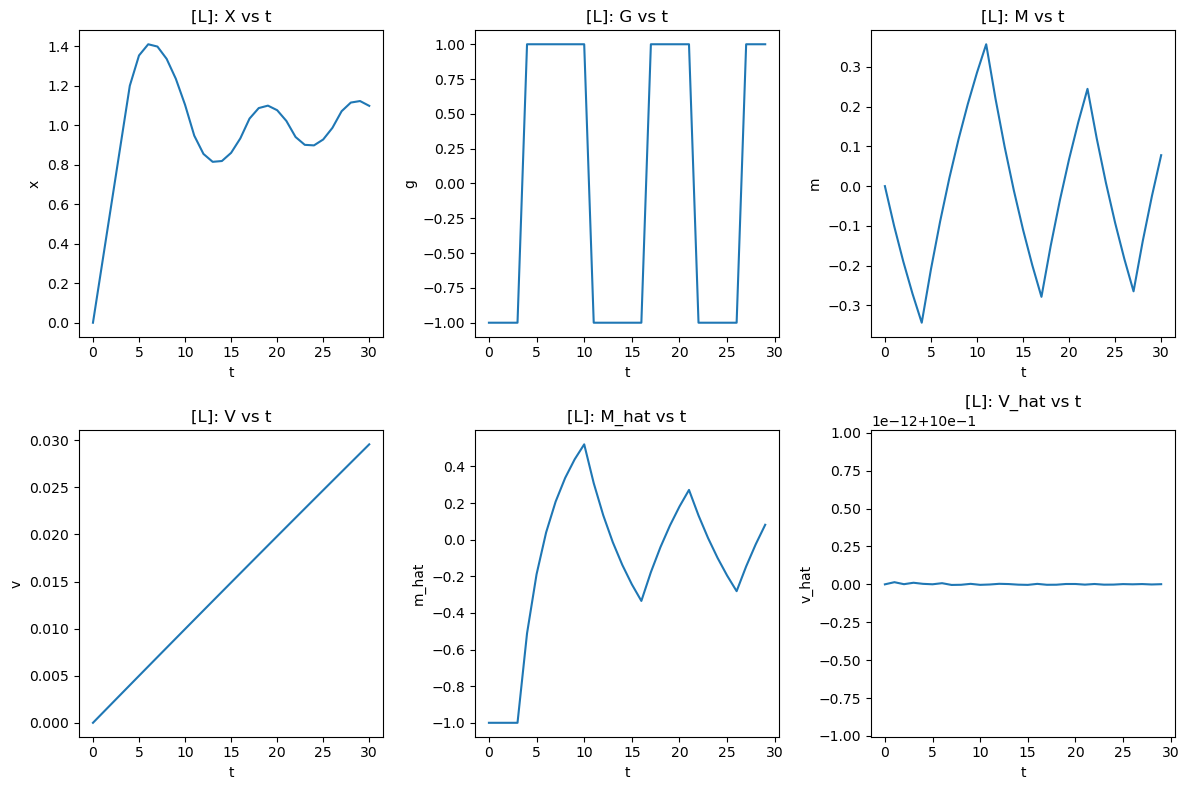

In [30]:
#plotting L
plot_adam_params("L", L_X, L_G, L_M, L_V, L_M_hat, L_V_hat)

### Explanation of graphs obtained



# <u>1.4: Plotting different values related to Adam Optimizer</u>

![1.4](./resources/1_4.png)

In the cells below I write the code required for plotting the values

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

#functions

def relu_derivative(x):
    return 1 if x > 0 else 0


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))


def abs_derivative(x):
    if x < 0:
        return -1
    elif x > 0:
        return 1
    else:
        return 0


#related to adam optimization(similar to old code but slightly different!)

def compute_gradient(theta_t, fx):
    if fx == "relu":
        return relu_derivative(theta_t)

    if fx == "sigmoid":
        return sigmoid_derivative(theta_t)

    if fx == "abs":
        return abs_derivative(theta_t)


def adam(t, theta_t, m_t, v_t, fx, alpha=0.3, epsilon=0, beta1=0.9, beta2=0.999):
    t += 1
    g = compute_gradient(theta_t, fx)
    m_next_t =  (beta1 * m_t) + ((1 - beta1) * g)
    v_next_t = (beta2 * v_t) + ((1 - beta2) * (g ** 2))
    m_next_t_hat = m_next_t / (1 - (beta1 ** t))
    v_next_t_hat = v_next_t / (1 - (beta2 ** t))
    next_theta = theta_t - ((alpha * m_next_t_hat) / (epsilon + v_next_t_hat ** 0.5))
    return g, m_next_t, v_next_t, m_next_t_hat, v_next_t_hat, next_theta


def run_adam_optimization(fx, max_iterations=30, x=2):
    X = [x]
    G = []
    M = [0]
    V = [0]
    M_hat = []
    V_hat = []

    m = 0
    v = 0
    convergence_threshold = 1e-5
    for t in tqdm(range(max_iterations)):
        #compute
        g, m, v, m_next_t_hat, v_next_t_hat, next_x = adam(t, x, m, v, fx)

        #show steps
        step = abs(next_x - x)
        # print("+" * 100)
        # print(f"x{t}: {x} -> x{t + 1}: {next_x} | Step: {step}")
        # print("=" * 100)
        x = next_x

        #save results
        X.append(x)
        G.append(g)
        M.append(m)
        V.append(v)
        M_hat.append(m_next_t_hat)
        V_hat.append(v_next_t_hat)

        #stop if convergence is reached!
        if step < convergence_threshold:
            print("Reached convergence!")
            break

    return X, G, M, V, M_hat, V_hat


In [10]:
relu_X, relu_G, relu_M, relu_V, relu_M_hat, relu_V_hat = run_adam_optimization("relu")
sigmoid_X, sigmoid_G, sigmoid_M, sigmoid_V, sigmoid_M_hat, sigmoid_V_hat = run_adam_optimization("sigmoid")
abs_X, abs_G, abs_M, abs_V, abs_M_hat, abs_V_hat = run_adam_optimization("abs")

100%|██████████| 30/30 [00:00<?, ?it/s]


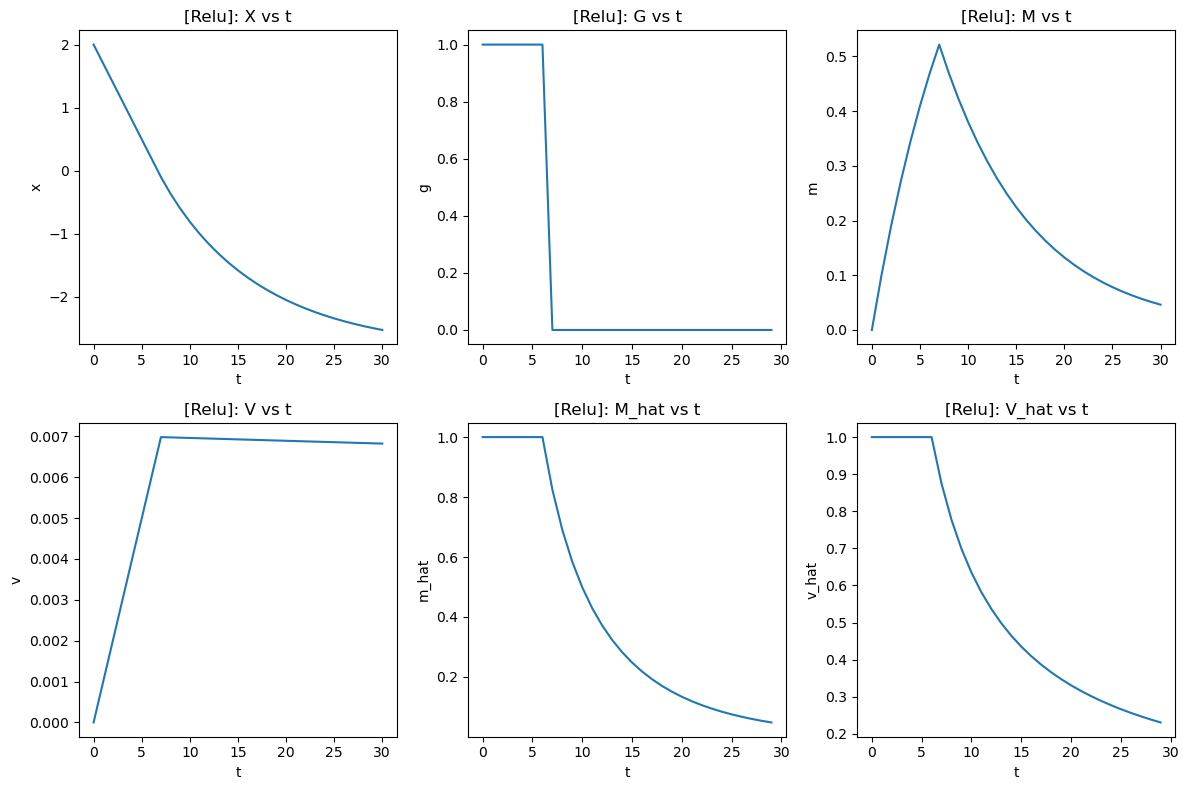

In [16]:
#plotting relu
plot_adam_params("Relu", relu_X, relu_G, relu_M, relu_V, relu_M_hat, relu_V_hat)

### Explanation of graphs obtained for Relu

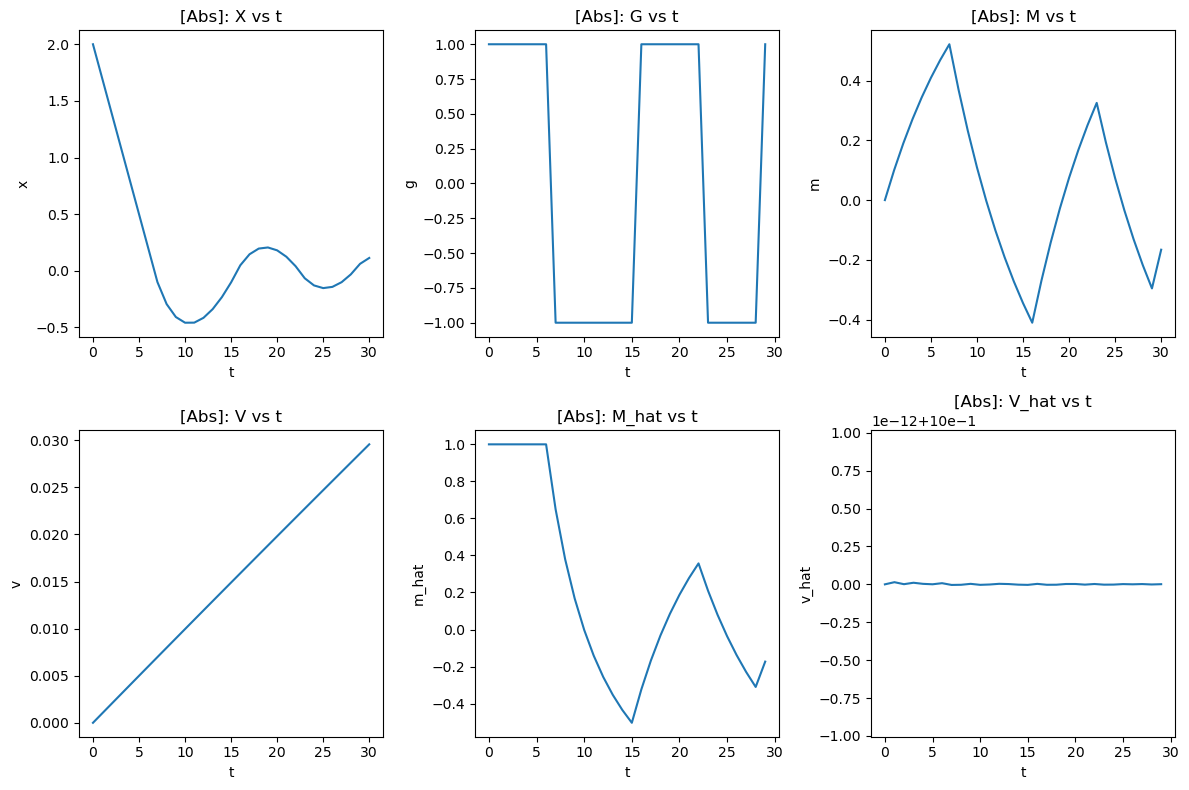

In [17]:
#plotting abs
plot_adam_params("Abs", abs_X, abs_G, abs_M, abs_V, abs_M_hat, abs_V_hat)

### Explanation of graphs obtained for Abs

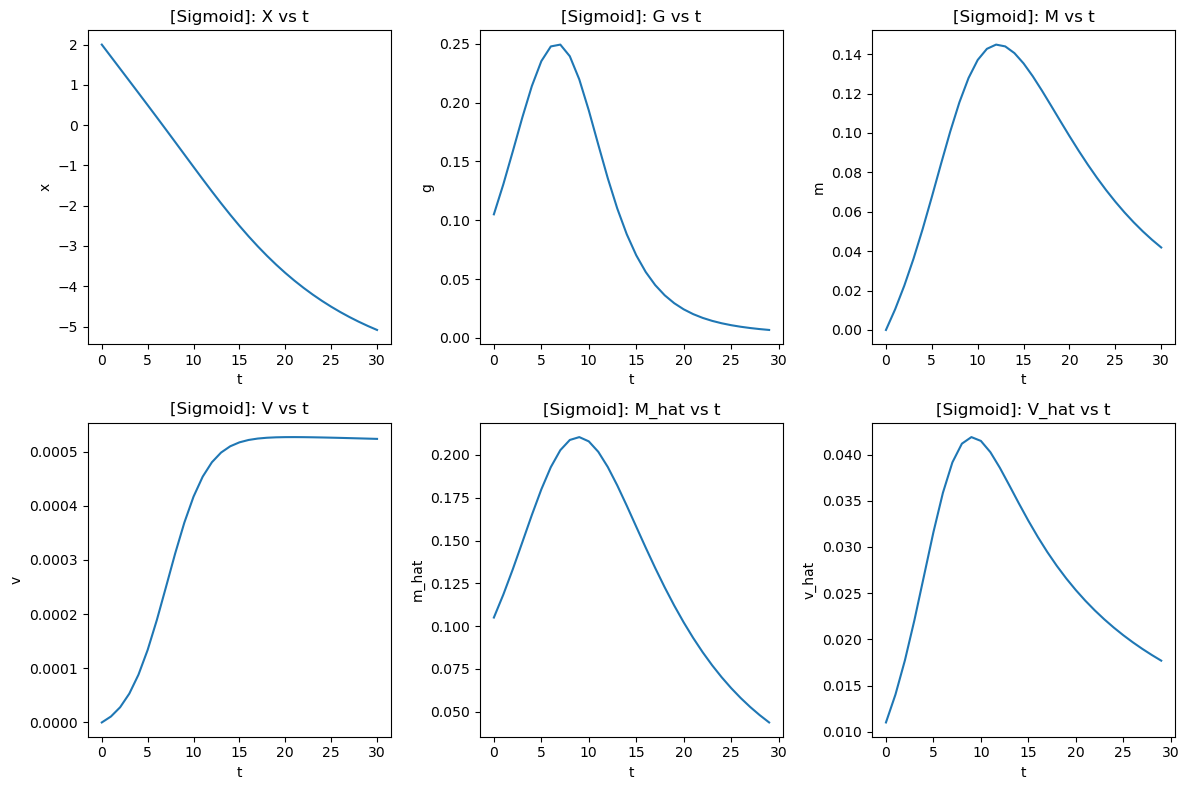

In [18]:
#plotting sigmoid
plot_adam_params("Sigmoid", sigmoid_X, sigmoid_G, sigmoid_M, sigmoid_V, sigmoid_M_hat, sigmoid_V_hat)

### Explanation of graphs obtained for sigmoid